**Cars4U Project**

**Background & Context**
There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past years and is larger than the new car market now. Cars4U is a budding tech start-up that aims to find footholes in this market.

In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car sellers replace their old cars with pre-owned cars instead of buying new ones. Unlike new cars, where price and supply are fairly deterministic and managed by OEMs (Original Equipment Manufacturer / except for dealership level discounts which come into play only in the last stage of the customer journey), used cars are very different beasts with huge uncertainty in both pricing and supply. Keeping this in mind, the pricing scheme of these used cars becomes important in order to grow in the market.

Create a pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing. For example, if the business knows the market price, it will never sell anything below it. 

**Objective**: 

**1.** Explore and visualize the dataset.

**2.** Build a linear regression model to predict the prices of used cars.

**3.** Generate a set of insights and recommendations that will help the business.





**Problems to solve**
1.   What variables will have the most significant impact on affecting the price prediction?
2.   What variables will have a positive correlation with price?
3.   What variables will have a negative correlation with price?


In [6]:
!pip install --upgrade statsmodels

     |████████████████████████████████| 10.5 MB 1.3 MB/s eta 0:00:01    |███████████                     | 3.6 MB 1.3 MB/s eta 0:00:06
     |████████████████████████████████| 66 kB 9.0 MB/s  eta 0:00:01
     |████████████████████████████████| 232 kB 13.4 MB/s eta 0:00:01
  Attempting uninstall: packaging
    Found existing installation: packaging 20.4
    Uninstalling packaging-20.4:
      Successfully uninstalled packaging-20.4
  Attempting uninstall: patsy
    Found existing installation: patsy 0.5.1
    Uninstalling patsy-0.5.1:
      Successfully uninstalled patsy-0.5.1
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.0
    Uninstalling statsmodels-0.12.0:
      Successfully uninstalled statsmodels-0.12.0


In [3]:
!pip install --upgrade scikit-learn

     |████████████████████████████████| 10.1 MB 1.8 MB/s eta 0:00:01    |███████████████▊                | 5.0 MB 1.8 MB/s eta 0:00:03
     |████████████████████████████████| 301 kB 29.0 MB/s eta 0:00:01
  Attempting uninstall: joblib
    Found existing installation: joblib 0.17.0
    Uninstalling joblib-0.17.0:
      Successfully uninstalled joblib-0.17.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.2
    Uninstalling scikit-learn-0.23.2:
      Successfully uninstalled scikit-learn-0.23.2


In [1]:

import warnings
warnings.filterwarnings('ignore')

import numpy as np   
import pandas as pd    
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm
#To remove scientific notation. This will prevent large numbers from displaying as exponents
np.set_printoptions(suppress=True)
# Removes the limit for the number of displayed columns
pd.set_option('display.max_columns', None)
# Sets the limit for the number of displayed rows
pd.set_option('display.max_rows', 200)

# To enable plotting graphs in Jupyter notebook
%matplotlib inline

# To build linear regression_model
from sklearn.linear_model import LinearRegression
# To check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Sklearn package's randomized data splitting function
from sklearn.model_selection import train_test_split 



**Data Dictionary**

**S.No.** : Serial Number

**Name** : Name of the car which includes Brand name and Model name

**Location** : The location in which the car is being sold or is available for purchase Cities

**Year** : Manufacturing year of the car

**Kilometers_driven** : The total kilometers driven in the car by the previous owner(s) in KM.

**Fuel_Type**: The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)

**Transmission** : The type of transmission used by the car. (Automatic / Manual)

**Owner** : Type of ownership

**Mileage** : The standard mileage offered by the car company in kmpl or km/kg

**Engine**: The displacement volume of the engine in CC.

**Power** : The maximum power of the engine in bhp.

**Seats** : The number of seats in the car.

**New_Price** : The price of a new car of the same model in INR Lakhs.(1 Lakh = 100, 000)

**Price** : The price of the used car in INR Lakhs (1 Lakh = 100, 000)

In [2]:
df = pd.read_csv('used_cars_data.csv')
used_cars= df.copy()
print(f'There are {used_cars.shape[0]} rows and {used_cars.shape[1]} columns.')  # f-string
# Prints 10 random rows

np.random.seed(1)
used_cars.sample(n=10)


There are 7253 rows and 14 columns.


,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
2397,2397,Ford EcoSport 1.5 Petrol Trend,Kolkata,2016,21460,Petrol,Manual,First,17.0 kmpl,1497 CC,121.36 bhp,5.0,9.47 Lakh,6.00
3777,3777,Maruti Wagon R VXI 1.2,Kochi,2015,49818,Petrol,Manual,First,21.5 kmpl,1197 CC,81.80 bhp,5.0,5.44 Lakh,4.11
4425,4425,Ford Endeavour 4x2 XLT,Hyderabad,2007,130000,Diesel,Manual,First,13.1 kmpl,2499 CC,141 bhp,7.0,NaN,6.00
3661,3661,Mercedes-Benz E-Class E250 CDI Avantgrade,Coimbatore,2016,39753,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.0,NaN,35.28
4514,4514,Hyundai Xcent 1.2 Kappa AT SX Option,Kochi,2016,45560,Petrol,Automatic,First,16.9 kmpl,1197 CC,82 bhp,5.0,NaN,6.34
599,599,Toyota Innova Crysta 2.8 ZX AT,Coimbatore,2019,40674,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,7.0,28.05 Lakh,24.82
186,186,Mercedes-Benz E-Class E250 CDI Avantgrade,Bangalore,2014,37382,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.0,NaN,32.00
305,305,Audi A6 2011-2015 2.0 TDI Premium Plus,Kochi,2014,61726,Diesel,Automatic,First,17.68 kmpl,1968 CC,174.33 bhp,5.0,NaN,20.77
4582,4582,Hyundai i20 1.2 Magna,Kolkata,2011,36000,Petrol,Manual,First,18.5 kmpl,1197 CC,80 bhp,5.0,NaN,2.50
5434,5434,Honda WR-V Edge Edition i-VTEC S,Kochi,2019,13913,Petrol,Manual,First,17.5 kmpl,1199 CC,88.7 bhp,5.0,9.36 Lakh,8.20


In [3]:
used_cars.info() #Displays datatypes for columns of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


**Observations**


*   Some columns datatypes are listed as objects but need to be converted to floats such as New_Price, Power and Engine.
*   Fuel_Type, Transmission and Owner_Type are categorical variables.

*   The dependent variable is Used Price




In [4]:
used_cars.isnull().sum() #Checks for any missing values in the dataset

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

There are missing values in Mileage, Engine, Power, Seats, New_Price and Price


In [5]:
# Checks for any missing values in the dataframe and drops the rows that contain missing values non-numeric features
used_cars.dropna(inplace=True)

used_cars.shape

# looking at value counts for non-numeric features

num_to_display = 10 # defining this up here so it's easy to change later if I want
for colname in used_cars.dtypes[used_cars.dtypes == 'object'].index:
  val_counts = used_cars[colname].value_counts(dropna=False) # i want to see NA counts
  print(val_counts[:num_to_display])
if len(val_counts) > num_to_display:
  print(f'Only displaying first {num_to_display} of {len(val_counts)} values.')
  print('\n\n') # just for more space between

Maruti Alto K10 VXI                        16
Toyota Innova Crysta 2.8 ZX AT             14
BMW 3 Series 320d                          13
Maruti Vitara Brezza ZDi Plus Dual Tone    12
BMW 5 Series 520d Luxury Line              12
Hyundai Grand i10 1.2 Kappa Sportz         11
Maruti Wagon R VXI                         11
BMW 3 Series Luxury Line                   10
Maruti Eeco 7 Seater Standard              10
Hyundai Grand i10 1.2 Kappa Asta            9
Name: Name, dtype: int64
Kochi         142
Mumbai        138
Coimbatore    135
Hyderabad      80
Pune           62
Kolkata        55
Delhi          54
Chennai        48
Jaipur         41
Ahmedabad      36
Name: Location, dtype: int64
Diesel    443
Petrol    371
CNG         9
Name: Fuel_Type, dtype: int64
Manual       512
Automatic    311
Name: Transmission, dtype: int64
First     765
Second     55
Third       3
Name: Owner_Type, dtype: int64
24.3 kmpl     36
18.9 kmpl     32
22.5 kmpl     28
28.4 kmpl     27
11.36 kmpl    23
13.68 kmp

In [6]:
used_cars.isnull().sum() 

S.No.                0
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
New_Price            0
Price                0
dtype: int64

The missing values have been removed from each column

In [7]:
# This loop prints the names of the columns where there is at least one entry ending in the character 'kmpl'
Mileage_cols = []
for colname in used_cars.columns[used_cars.dtypes == 'object']:  # only need to consider string columns
    if used_cars[colname].str.endswith('kmpl').any():  # using `.str` so I can use an element-wise string method
        Mileage_cols.append(colname)
print(Mileage_cols)

['Mileage']


In [8]:
# Defining a function to extract the amount of kmpl


def Mileage_to_num(Mileage_val):
    """
    This function takes in a string representing the amount of kmpl and km/kg
    and converts it to mpg. For example, '18.2kmpl' becomes 42.8 mpg.
    If the input is already numeric, which probably means it's NaN,
    this function just returns np.nan.
    """
    if isinstance(Mileage_val, str):  # checks if 'Mileage_val' is a string
        multiplier = 1
        if Mileage_val.endswith('kmpl'):
            multiplier = 2.352145
        elif Mileage_val.endswith('km/kg'):
            multiplier = (0.621371/371.028338284)
        return float(Mileage_val.replace('kmpl', '').replace('km/kg', '')) * multiplier
              # converting kmpl to mpg by multiplying by 2.352145
                # converting km/kg to mpg 
    else:  # this happens when the current ram is np.nan
        return np.nan

for colname in Mileage_cols:
    used_cars[colname] = used_cars[colname].apply(Mileage_to_num)
    
used_cars[Mileage_cols].head()  

,Mileage
2,42.809039
7,26.720367
10,50.712246
15,31.753958
20,53.370170


The data in mileage column has been converted to miles per gallon and we can also amend the Mileage column to include the measurement of MGP

In [9]:

used_cars.rename(columns= {'Mileage':'Mileage_MPG'}, inplace=True) #Changes the name of the Mileage column

In [10]:
used_cars[['Mileage_MPG']]

,Mileage_MPG
2,42.809039
7,26.720367
10,50.712246
15,31.753958
20,53.370170
...,...
5999,41.327188
6002,37.846013
6005,57.157124
6010,43.514683


Mileage was successfully converted to Mileage_MPG. Engine, Power and New_Price column names will need to be changed as well.

In [11]:
# This loop prints the names of the columns where there is at least one entry ending the characters 'CC', 'bhp', 'Lakh'
eng_pwr_pri_col = []
for colname in used_cars.columns[used_cars.dtypes == 'object']:  # only need to consider string columns
    if used_cars[colname].str.endswith('CC').any():  # using `.str` so I can use an element-wise string method
      eng_pwr_pri_col.append(colname)
    elif used_cars[colname].str.endswith('bhp').any():
        eng_pwr_pri_col.append(colname)
    elif used_cars[colname].str.endswith('Lakh').any():
        eng_pwr_pri_col.append(colname)
    
print(eng_pwr_pri_col)


['Engine', 'Power', 'New_Price']


In [12]:
#This function will remove the letters at the end of each numerical value under the Engine, Power and New_Price columns 
def eng_pwr_pri_conv(eng_pwr_pri_conv_val):
  if isinstance(eng_pwr_pri_conv_val, str):
      if eng_pwr_pri_conv_val.endswith('CC'):
        return float(eng_pwr_pri_conv_val.replace('CC', ''))
      elif eng_pwr_pri_conv_val.endswith('bhp'): 
        return float(eng_pwr_pri_conv_val.replace('bhp', ''))
      elif eng_pwr_pri_conv_val.endswith('Lakh'):
        return  float(eng_pwr_pri_conv_val.replace('Lakh', ''))      
  else: 
      return np.nan




In [13]:
for colname in eng_pwr_pri_col: # Loops through each column specified in the funciton 
    used_cars[colname] = used_cars[colname].apply(eng_pwr_pri_conv)
    
used_cars[eng_pwr_pri_col].head()  #Prints the columns without the letters that were attached to each numerical value

,Engine,Power,New_Price
2,1199.0,88.70,8.61
7,2755.0,171.50,21.00
10,1462.0,103.25,10.65
15,2477.0,175.56,32.01
20,1995.0,190.00,47.87


In [14]:

    
used_cars[['Engine', 'Power', 'New_Price']].head()  # good to go!


,Engine,Power,New_Price
2,1199.0,88.70,8.61
7,2755.0,171.50,21.00
10,1462.0,103.25,10.65
15,2477.0,175.56,32.01
20,1995.0,190.00,47.87


We will also need to attach the respective measurement abbreviations for Engine, Power, New_Price and Price

In [15]:
#Renames columns so that their measurements are included 
used_cars.rename(columns= {'Engine':'Engine_CC'}, inplace=True)
used_cars.rename(columns= {'Power':'Power_Bhp'}, inplace=True)
used_cars.rename(columns= {'New_Price':'New_Price_Lakh'}, inplace=True)
used_cars.rename(columns= {'Price':'Price_Lakh'}, inplace=True)

We will also change Price_Lakh to Used_Price_Lakh 

In [16]:
used_cars.rename(columns= {'Price_Lakh':'Used_Price_Lakh'}, inplace=True) 

In [17]:
used_cars[['Engine_CC', 'Power_Bhp', 'New_Price_Lakh', 'Used_Price_Lakh']].head()

,Engine_CC,Power_Bhp,New_Price_Lakh,Used_Price_Lakh
2,1199.0,88.70,8.61,4.50
7,2755.0,171.50,21.00,17.50
10,1462.0,103.25,10.65,9.95
15,2477.0,175.56,32.01,15.00
20,1995.0,190.00,47.87,18.55


The goal of this research is to determine the price of used cars, so we can probably drop the New_Price_Lakh column. S.No. can be dropped as well because the serial number correlates with the order of the rows.

In [18]:
used_cars.drop(['New_Price_Lakh', 'S.No.'], axis=1, inplace=True) #Drops the selected columns

In [19]:
used_cars.head(1) #New_Price_Lakh and S.No. columns have been removed

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage_MPG,Engine_CC,Power_Bhp,Seats,Used_Price_Lakh
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,42.809039,1199.0,88.7,5.0,4.5


**The Year column does not give enough information. We will need to create a new column to determine how many years the car has been used. This can be done by creating a column called current_year and subtracting the Year column to create a new column of years used.**

In [20]:
used_cars['current_year'] = 2021 #Creates a column for the current year

In [21]:
used_cars.head(1) #Column for current year has been created

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage_MPG,Engine_CC,Power_Bhp,Seats,Used_Price_Lakh,current_year
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,42.809039,1199.0,88.7,5.0,4.5,2021


In [22]:
used_cars['no_years'] = used_cars['current_year'] - used_cars['Year'] # Creates a new column showing the No of years used

In [23]:
used_cars.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage_MPG,Engine_CC,Power_Bhp,Seats,Used_Price_Lakh,current_year,no_years
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,42.809039,1199.0,88.70,5.0,4.50,2021,10
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,26.720367,2755.0,171.50,8.0,17.50,2021,5
10,Maruti Ciaz Zeta,Kochi,2018,25692,Petrol,Manual,First,50.712246,1462.0,103.25,5.0,9.95,2021,3
15,Mitsubishi Pajero Sport 4X4,Delhi,2014,110000,Diesel,Manual,First,31.753958,2477.0,175.56,7.0,15.00,2021,7
20,BMW 3 Series 320d,Kochi,2014,32982,Diesel,Automatic,First,53.370170,1995.0,190.00,5.0,18.55,2021,7


In [24]:
used_cars.drop(['Year', 'current_year'], axis=1, inplace=True) #Drops year and current year

In [25]:
used_cars.head(3)

,Name,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage_MPG,Engine_CC,Power_Bhp,Seats,Used_Price_Lakh,no_years
2,Honda Jazz V,Chennai,46000,Petrol,Manual,First,42.809039,1199.0,88.70,5.0,4.50,10
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,36000,Diesel,Automatic,First,26.720367,2755.0,171.50,8.0,17.50,5
10,Maruti Ciaz Zeta,Kochi,25692,Petrol,Manual,First,50.712246,1462.0,103.25,5.0,9.95,3


In [26]:
used_cars['Name'].value_counts(normalize = True)

Maruti Alto K10 VXI                        0.019441
Toyota Innova Crysta 2.8 ZX AT             0.017011
BMW 3 Series 320d                          0.015796
Maruti Vitara Brezza ZDi Plus Dual Tone    0.014581
BMW 5 Series 520d Luxury Line              0.014581
                                             ...   
Maruti Ertiga ZDI Plus                     0.001215
Maruti Baleno Zeta CVT                     0.001215
Tata Bolt Quadrajet XM                     0.001215
Mercedes-Benz GLA Class 200 Sport          0.001215
Tata Bolt Revotron XT                      0.001215
Name: Name, Length: 321, dtype: float64

We'll split brands from models to make it more manageable

In [27]:
#Splits column name into brand and model
used_cars['Brand'] = used_cars.Name.apply(lambda x: x.split()[0])
used_cars['model'] = used_cars.Name.apply(lambda x: x.split(' ', 1)[1])

In [28]:
used_cars.head() #Brand and model columns have been added

,Name,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage_MPG,Engine_CC,Power_Bhp,Seats,Used_Price_Lakh,no_years,Brand,model
2,Honda Jazz V,Chennai,46000,Petrol,Manual,First,42.809039,1199.0,88.70,5.0,4.50,10,Honda,Jazz V
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,36000,Diesel,Automatic,First,26.720367,2755.0,171.50,8.0,17.50,5,Toyota,Innova Crysta 2.8 GX AT 8S
10,Maruti Ciaz Zeta,Kochi,25692,Petrol,Manual,First,50.712246,1462.0,103.25,5.0,9.95,3,Maruti,Ciaz Zeta
15,Mitsubishi Pajero Sport 4X4,Delhi,110000,Diesel,Manual,First,31.753958,2477.0,175.56,7.0,15.00,7,Mitsubishi,Pajero Sport 4X4
20,BMW 3 Series 320d,Kochi,32982,Diesel,Automatic,First,53.370170,1995.0,190.00,5.0,18.55,7,BMW,3 Series 320d


In [29]:
used_cars.drop(['Name', 'model'], axis=1, inplace=True)

In [30]:
used_cars.head() #Name and model have been removed. Brand has been added as a column

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage_MPG,Engine_CC,Power_Bhp,Seats,Used_Price_Lakh,no_years,Brand
2,Chennai,46000,Petrol,Manual,First,42.809039,1199.0,88.70,5.0,4.50,10,Honda
7,Mumbai,36000,Diesel,Automatic,First,26.720367,2755.0,171.50,8.0,17.50,5,Toyota
10,Kochi,25692,Petrol,Manual,First,50.712246,1462.0,103.25,5.0,9.95,3,Maruti
15,Delhi,110000,Diesel,Manual,First,31.753958,2477.0,175.56,7.0,15.00,7,Mitsubishi
20,Kochi,32982,Diesel,Automatic,First,53.370170,1995.0,190.00,5.0,18.55,7,BMW


In [31]:
used_cars['Brand'].value_counts()

Maruti           194
Hyundai           96
Toyota            82
Honda             68
BMW               57
Tata              43
Volkswagen        42
Mercedes-Benz     42
Renault           27
Mahindra          25
Ford              25
Audi              24
Skoda             19
Mini              16
Jeep              15
Nissan            15
Land              10
Datsun             7
Mitsubishi         6
Jaguar             4
Volvo              3
Isuzu              1
Fiat               1
Porsche            1
Name: Brand, dtype: int64

There are 24 unique brands of cars in the dataset 

In [32]:
used_cars = used_cars.round(decimals=2) # Rounds all the numerical values in the dataset to the nearest 

In [33]:

used_cars.describe().T

,count,mean,std,min,25%,50%,75%,max
Kilometers_Driven,823.0,40498.402187,28791.171759,600.0,20487.500,34895.00,53829.00,215000.0
Mileage_MPG,823.0,45.235152,11.430124,0.0,38.105,44.69,53.37,66.8
Engine_CC,823.0,1615.489672,562.811691,799.0,1197.000,1497.00,1995.00,4951.0
Power_Bhp,823.0,120.227995,55.623259,53.0,81.860,99.00,166.85,444.0
Seats,823.0,5.304982,0.795707,2.0,5.000,5.00,5.00,8.0
Used_Price_Lakh,823.0,13.647606,14.860539,0.7,5.000,8.20,17.50,160.0
no_years,823.0,5.130012,2.378709,2.0,4.000,5.00,6.00,20.0


The average price for a used car is 13.64 Lakh and the median price is 8Lakh. This means the price may have a left skew. The max price is 160 Lakh. The mean and median for no. of years used is 5.

In [34]:

used_cars.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Location,823,11,Kochi,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Kilometers_Driven,823,NaN,NaN,NaN,40498.4,28791.2,600,20487.5,34895,53829,215000
Fuel_Type,823,3,Diesel,443,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,823,2,Manual,512,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,823,3,First,765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage_MPG,823,NaN,NaN,NaN,45.2352,11.4301,0,38.105,44.69,53.37,66.8
Engine_CC,823,NaN,NaN,NaN,1615.49,562.812,799,1197,1497,1995,4951
Power_Bhp,823,NaN,NaN,NaN,120.228,55.6233,53,81.86,99,166.85,444
Seats,823,NaN,NaN,NaN,5.30498,0.795707,2,5,5,5,8
Used_Price_Lakh,823,NaN,NaN,NaN,13.6476,14.8605,0.7,5,8.2,17.5,160


At first glance, we notice the Maruti vehicle appears the most frequently. The most frequent location where used cars are bought is in Kochi, India. Diesel was the most frequent fuel type. Manual was the most frequent type of transmission compared to automatic.

# Exploratory Data Analysis and Data Preprocessing 

**Univariate Analysis**

In [35]:
# While doing univariate analysis of numerical variables we want to study their central tendency and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical variable.
# This function takes the numerical column as the input and returns the boxplots and histograms for the variable.


def histogram_boxplot(feature, figsize=(15, 10), bins=None):

    """Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    
    sns.set(font_scale=2)  # setting the font scale for seaborn
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid=2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    plt.ticklabel_format(style='plain', axis='x',useOffset=False)
    plt.xticks(rotation=90)
    
    sns.boxplot(
         
        feature, ax=ax_box2, showmeans=True, color="red"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins) if bins else sns.distplot(
        feature, kde=False, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        feature.mean(), color="g", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        feature.median(), color="black", linestyle="-"
    )  # Add median to the histogram

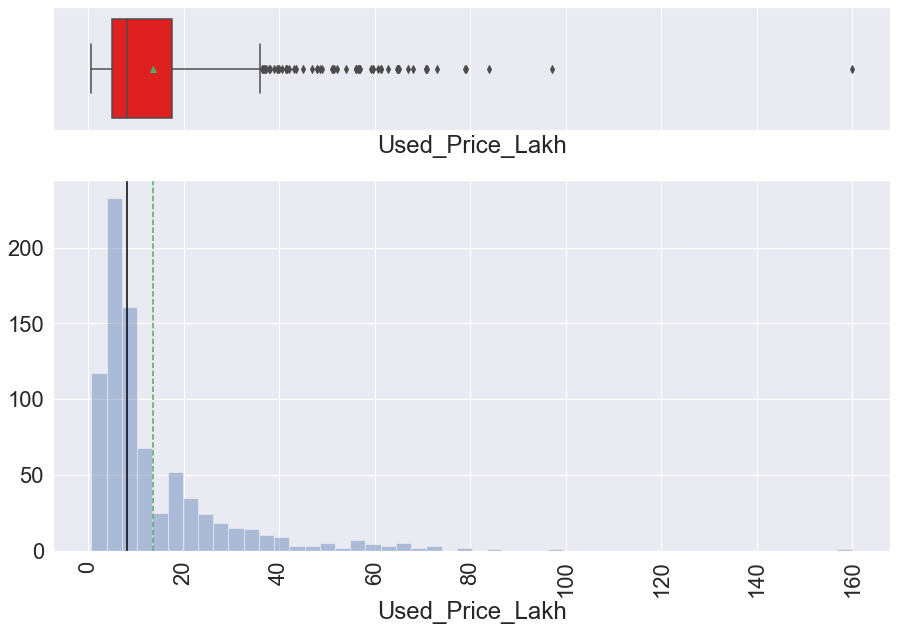

In [36]:
histogram_boxplot(used_cars['Used_Price_Lakh'])

The data is highly skewed to the left. This is due to the large amount of outliers. We may need to remove them later. 

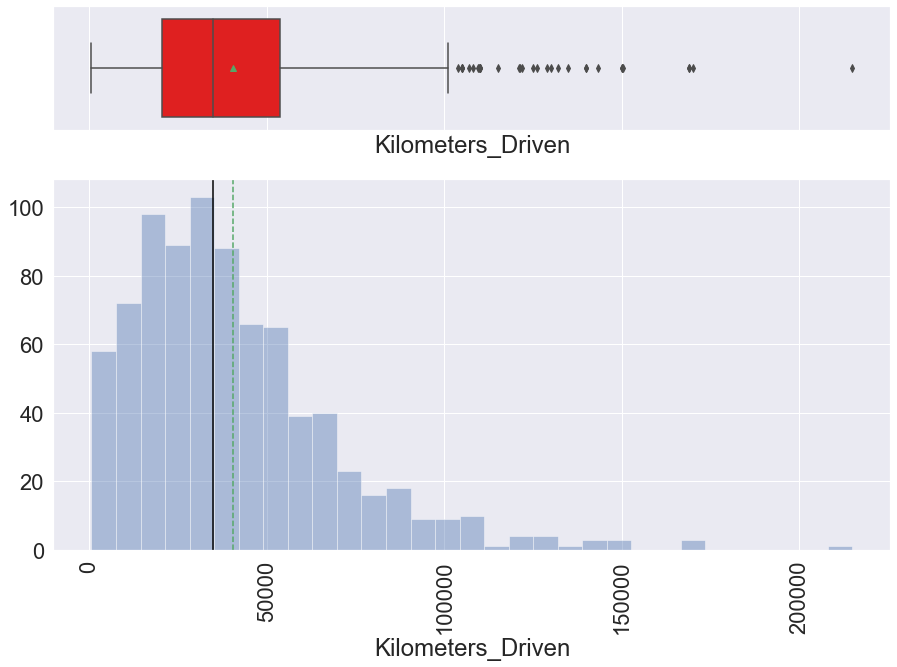

In [37]:
histogram_boxplot(used_cars['Kilometers_Driven'])

The data is highly skewed to the right. There are a significant amount of outliers after 100000 km driven. The average kilometers driven is around 40498 and the median is 34895.

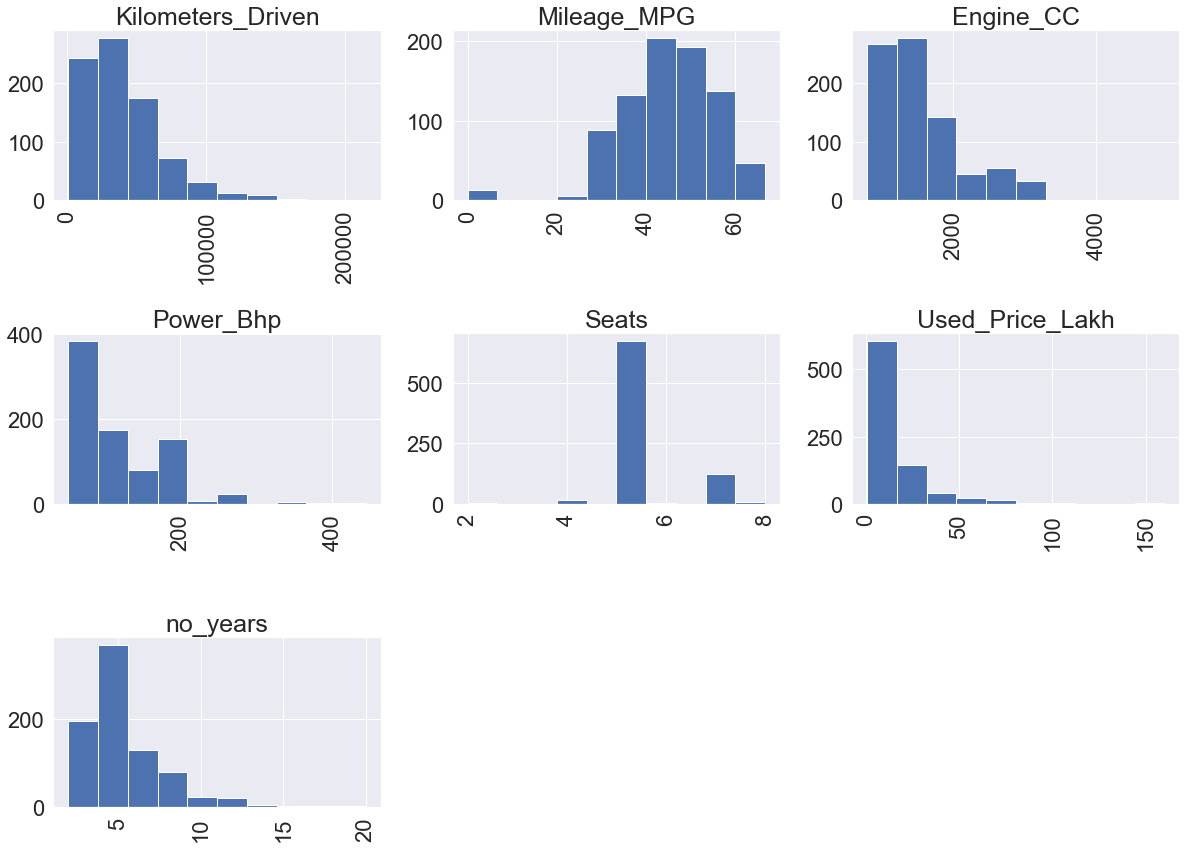

In [38]:
# Plots histograms of all numerical variables

all_col = used_cars.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(17, 75))

for i in range(len(all_col)):
    plt.subplot (18, 3, i + 1)
    plt.hist(used_cars[all_col[i]])
    # sns.histplot(used_cars[all_col[i]], kde=True)  # you can comment the previous line and run this one to get distribution curves
    plt.tight_layout()
    plt.title(all_col[i], fontsize=25)
    plt.ticklabel_format(style='plain', axis='x',useOffset=False)
    plt.xticks(rotation=90)
plt.show()


# Observation


* **Mileage and Seats** is somewhat normally distributed
* The other plots are skewed to the right
* Interpretation of left and right skewed:
  *   **Engine data** is skewed to the  right indicating the displacement volume of the engine is beyond 3000CC
  *   **Power data** is skewed to the right indicating there are some observations where the maximum power of the engine is beyond 200Bhp
  *   **No_years** is skewed to the right indicating there are some observations where the number of years owned is beyond 14











**We will filter the dataset to reduce the number of car names. The filtering will be specifically targeted towards outliers in the numerical columns**

# Bivariate Analysis
**Checking For Correlations**

In [39]:

used_cars[used_cars.columns[:]].corr()['Used_Price_Lakh'][:]

Kilometers_Driven   -0.154463
Mileage_MPG         -0.363555
Engine_CC            0.696675
Power_Bhp            0.777187
Seats                0.046168
Used_Price_Lakh      1.000000
no_years            -0.227202
Name: Used_Price_Lakh, dtype: float64

<AxesSubplot:>

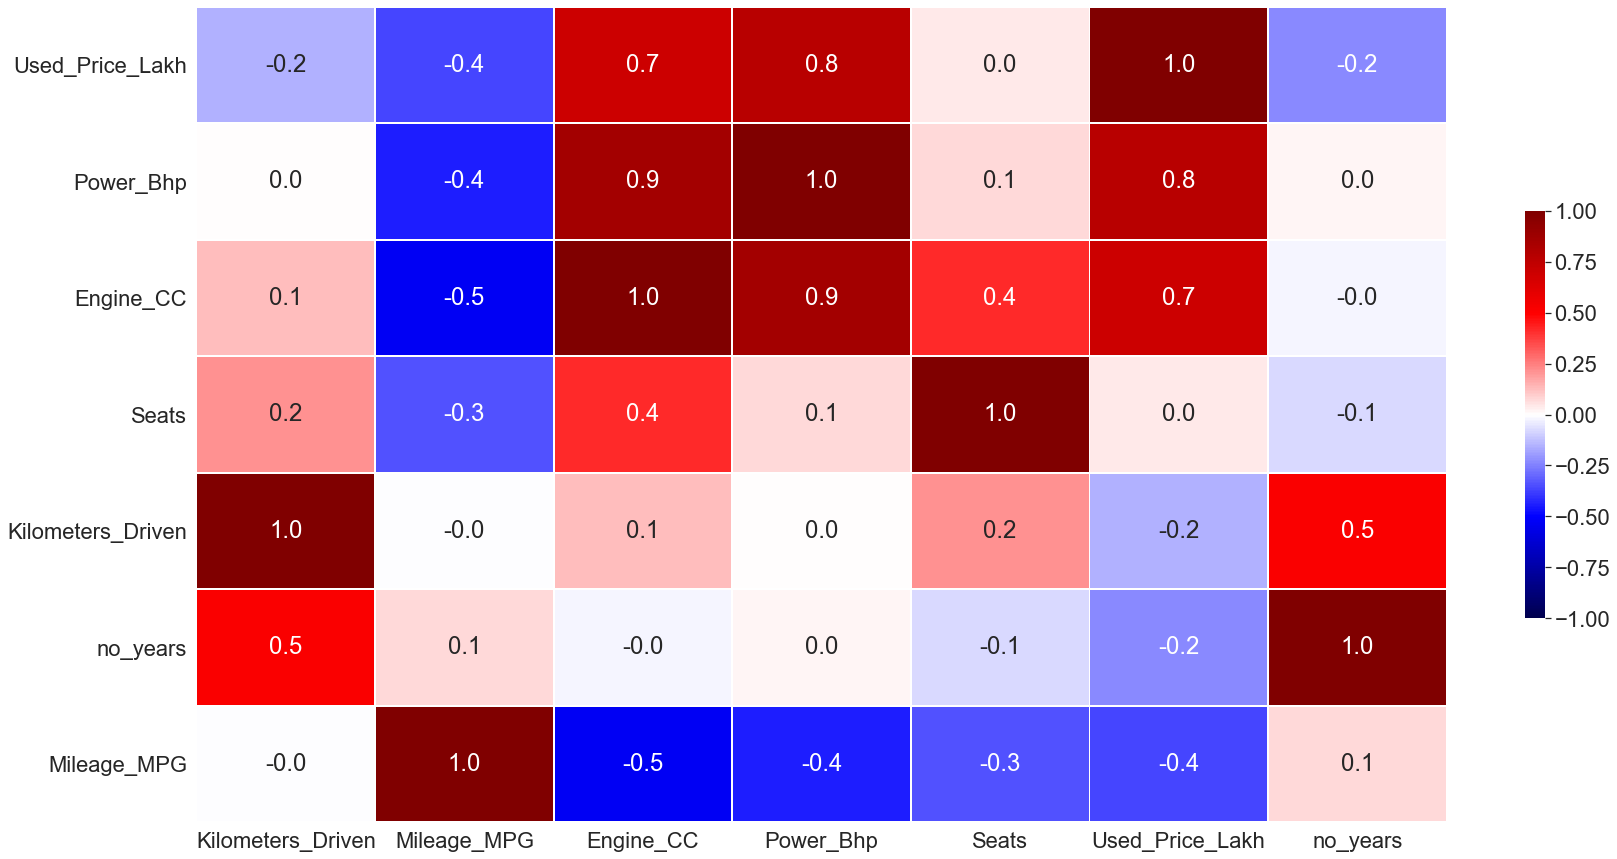

In [40]:
numeric_columns = used_cars.select_dtypes(include=np.number).columns.tolist()
corr = (
    used_cars[numeric_columns].corr().sort_values(by=['Used_Price_Lakh'], ascending=False)
)  # sorting correlations w.r.t used price

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(28, 15))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(
    corr,
    cmap='seismic',
    annot=True,
    fmt=".1f",
    vmin=-1,
    vmax=1,
    center=0,
    square=False,
    linewidths=0.7,
    cbar_kws={'shrink': 0.5},
)

# Observations

*   The highest positive correlations are between the used price and engine, used price and power. This indicates that as maximum power and displacement volume of the vehicle's engine increase, so will the price.


*  There is a low positive correlation between no of years and used prices. 

*  Mileage and kilometers driven are negatively correlated with used prices. That could be an indicator that the price decreases as the mileage and kilometers driven increase.

*  Seats has a correlation of 0 with used price. It will be better to drop it when fitting the linear regression model.






# Let's look at the graphs of a few variables that are highly correlated with Used Prices.

**Used Price vs Power vs Fuel Type**

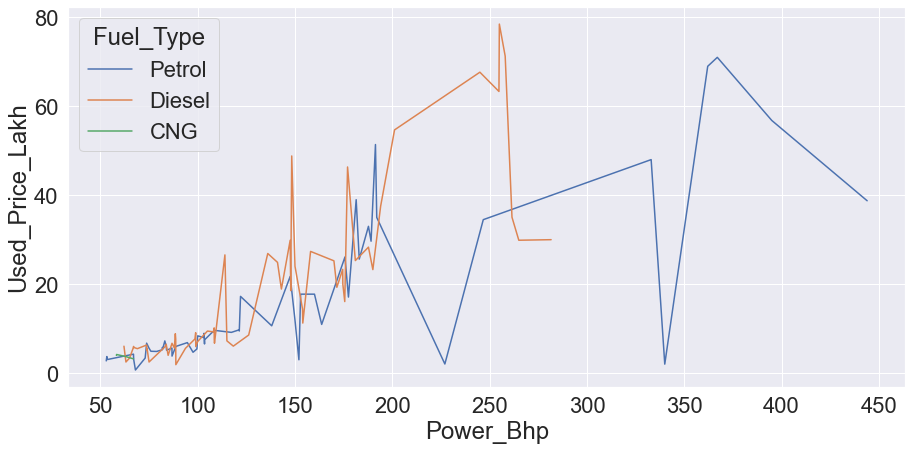

In [41]:
plt.figure(figsize=(15, 7))
sns.lineplot(x='Power_Bhp', y='Used_Price_Lakh', hue='Fuel_Type', data=used_cars, ci=None)

plt.ticklabel_format(style='plain', axis='y',useOffset=False)

# Observations
There is a positive correlation between the maximum power of the vehicle and its price. Diesel seems to have a stronger positive correlation with power and price compared to Petrol

**Used Price vs Engine vs Transmission**

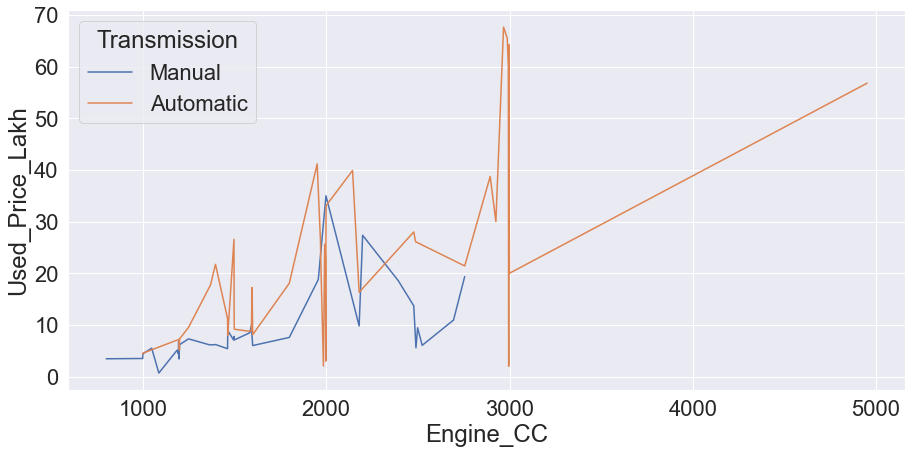

In [42]:
plt.figure(figsize=(15, 7))
sns.lineplot(x='Engine_CC', y='Used_Price_Lakh',  hue='Transmission', data=used_cars, ci=None)

plt.ticklabel_format(style='plain', axis='y',useOffset=False)

# Observations
* The chart shows that the price increases along with the displacement of the engine's volume indicating a positive correlation. 
* Automatic had the highest positive correlation when compared to Manual.

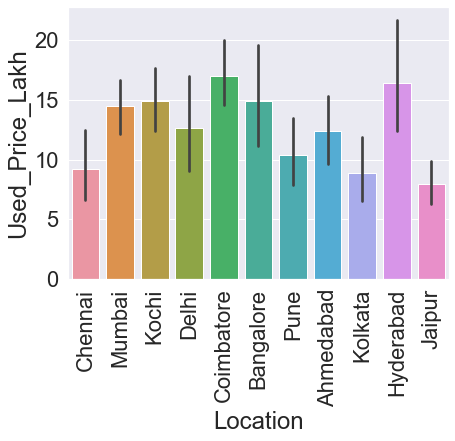

In [43]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.barplot(data=used_cars, y='Used_Price_Lakh', x='Location')
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='y',useOffset=False)


plt.show()

# Observations

  The highest used car prices were competitive in Coimbatore, Bangalore, Ahmedabad and Delhi. Jalpur contains 
the lowest price.  




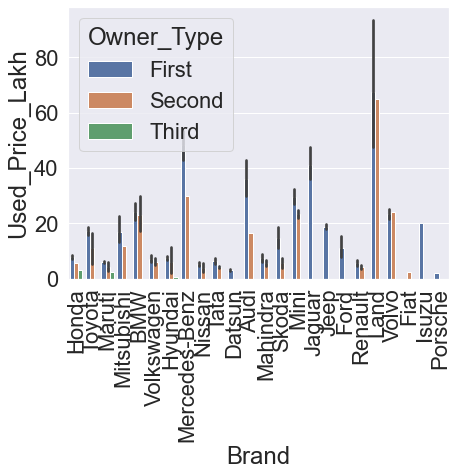

In [44]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.barplot(data=used_cars, y='Used_Price_Lakh', x='Brand', hue='Owner_Type')
plt.ticklabel_format(style='plain', axis='y',useOffset=False)
plt.xticks(rotation=90)

plt.show()

# Observations
Land had the highest prices among first and second car owners. Prices for first and second car owners for the BMW, Volvo and Toyota were competitive. 

**We can further classify the column brands based on their level of price using binning**

In [45]:
# We can group the cars by level of price based on Economical, Mid_Range and Luxury using binning
used_cars['Brand_Type'] = pd.cut(used_cars['Used_Price_Lakh'], bins = [0.6, 8.2, 15.5, 150], labels = ['Economical', 'Mid_Range', 'Luxury'])

In [46]:
used_cars.head()

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage_MPG,Engine_CC,Power_Bhp,Seats,Used_Price_Lakh,no_years,Brand,Brand_Type
2,Chennai,46000,Petrol,Manual,First,42.81,1199.0,88.70,5.0,4.50,10,Honda,Economical
7,Mumbai,36000,Diesel,Automatic,First,26.72,2755.0,171.50,8.0,17.50,5,Toyota,Luxury
10,Kochi,25692,Petrol,Manual,First,50.71,1462.0,103.25,5.0,9.95,3,Maruti,Mid_Range
15,Delhi,110000,Diesel,Manual,First,31.75,2477.0,175.56,7.0,15.00,7,Mitsubishi,Mid_Range
20,Kochi,32982,Diesel,Automatic,First,53.37,1995.0,190.00,5.0,18.55,7,BMW,Luxury


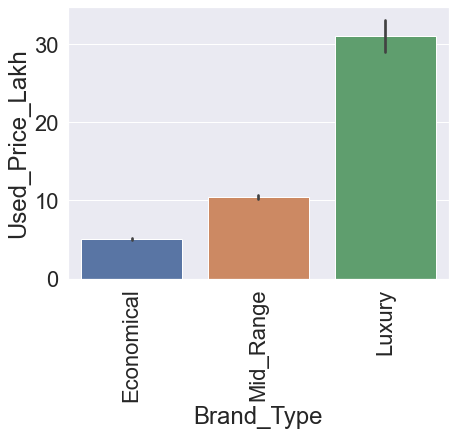

In [47]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.barplot(data=used_cars, y='Used_Price_Lakh', x='Brand_Type')
plt.ticklabel_format(style='plain', axis='y',useOffset=False)
plt.xticks(rotation=90)

plt.show()

**Observations**

Luxury vehicles obviously have the highest prices followed by the Mid Range and then Economical types

**Let's look at outliers in every numerical column**

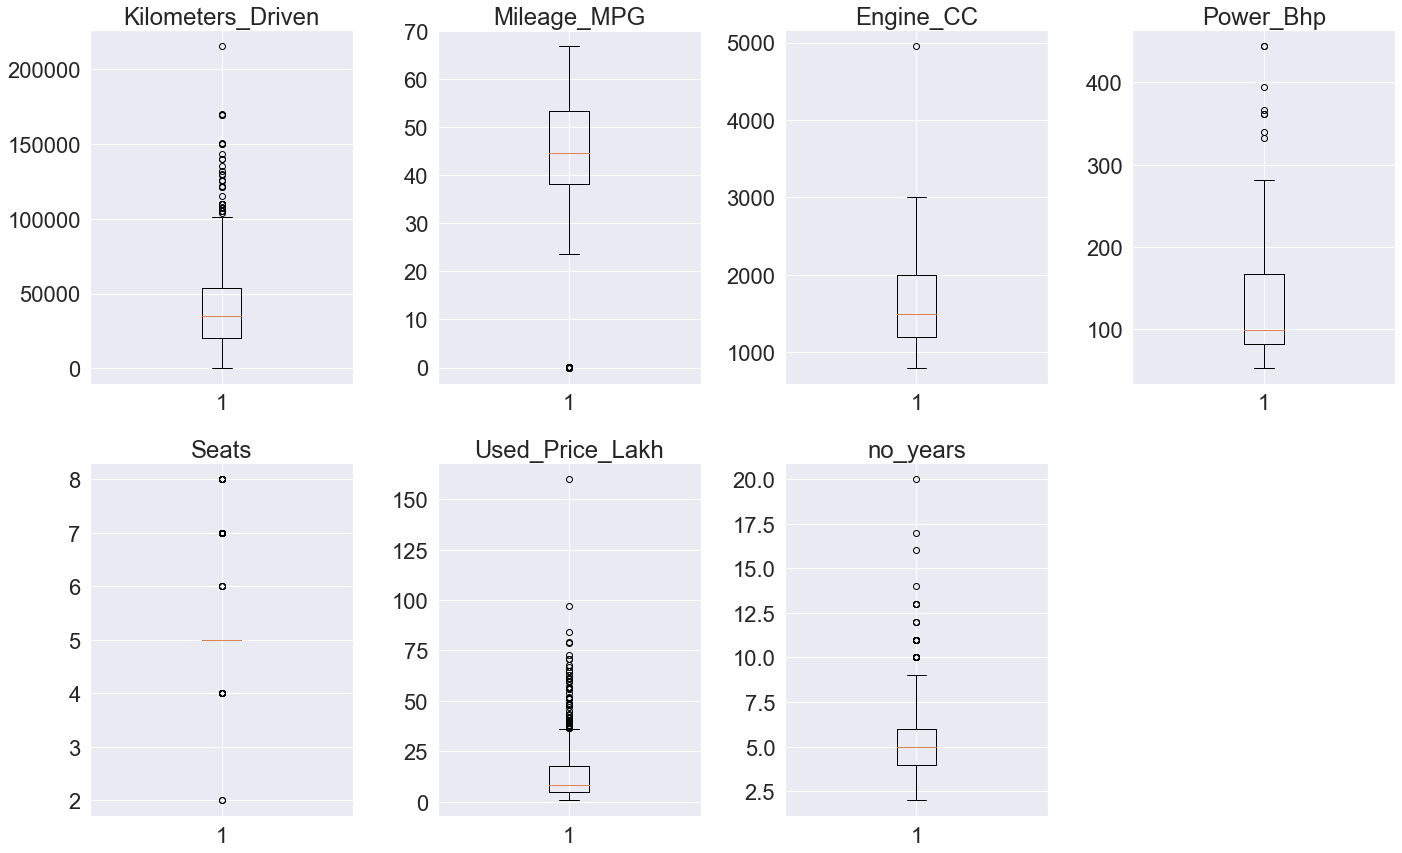

In [48]:
# let's plot the boxplots of all columns to check for outliers
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(used_cars[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

*   Used_Price_Lakh, Kilometers_Driven, Power_Bhp, no_years have the most significant outliers in the upper area. 



*   Engine has upper outliers as well but they are much less significant.

*   Seats has outliers in the upper and lower areas.





*    Mileage is the only one with outliers in the lower area.

*   Treating these outliers could have an effect on the linear model







**Outlier Treatment**

In [49]:
# Let's treat outliers by flooring and capping
def treat_outliers(used_cars, col):
    """
    treats outliers in a variable
    col: str, name of the numerical variable
    used_cars: dataframe
    col: name of the column
    """
    Q1 = used_cars[col].quantile(0.25)  # 25th quantile
    Q3 = used_cars[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    used_cars[col] = np.clip(used_cars[col], Lower_Whisker, Upper_Whisker)

    return used_cars


def treat_outliers_all(used_cars, col_list):
    """
    treat outlier in all numerical variables
    col_list: list of numerical variables
    used_cars: data frame
    """
    for c in col_list:
        used_cars = treat_outliers(used_cars, c)

    return used_cars

**Treating the Outliers**

In [50]:
numerical_col = used_cars.select_dtypes(include=np.number).columns.tolist()
used_cars = treat_outliers_all(used_cars, numerical_col)

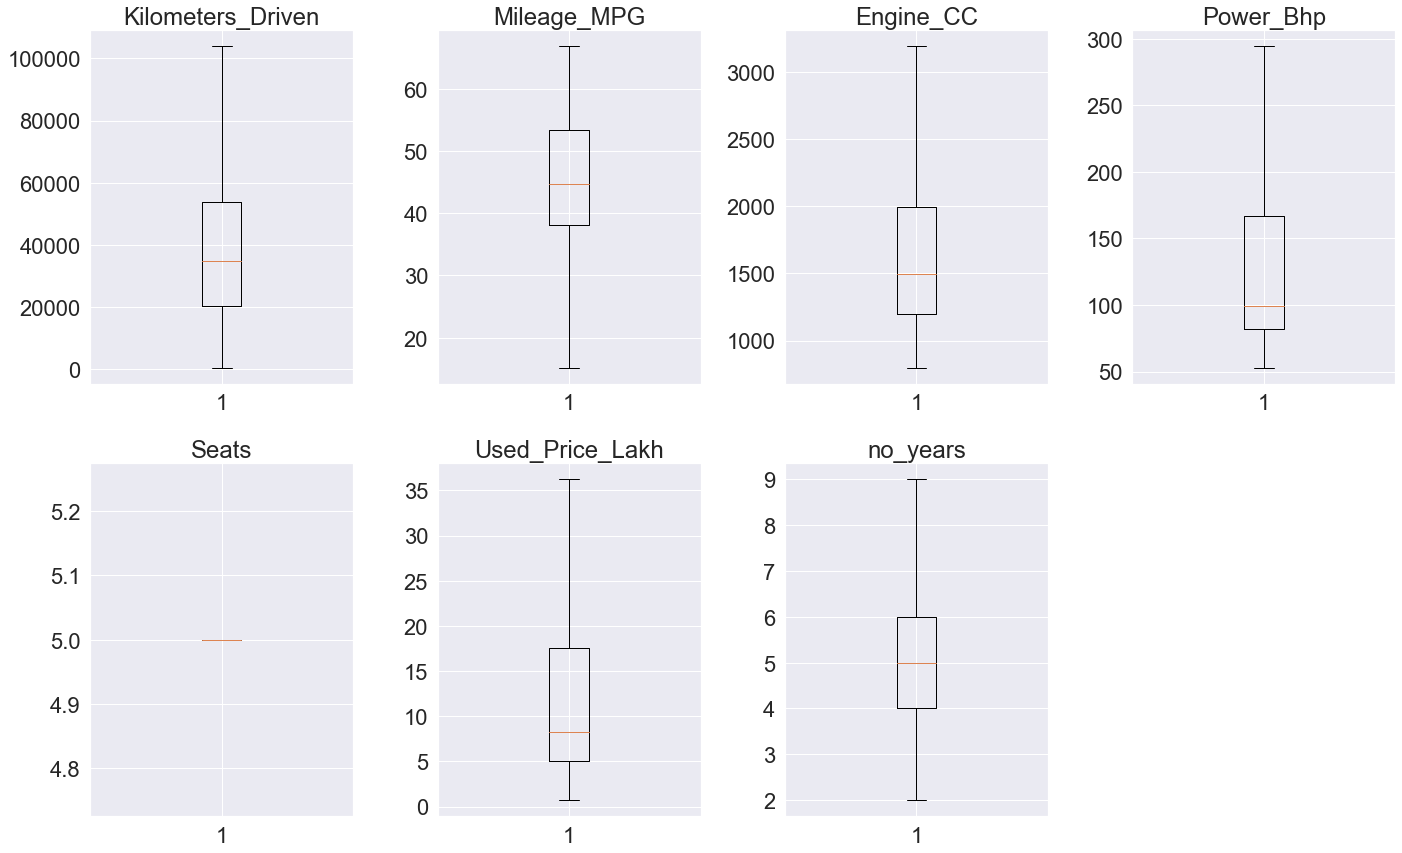

In [51]:
# Graphs box plot to see if outliers have been treated or not
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(used_cars[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**The outliers are no longer visible**

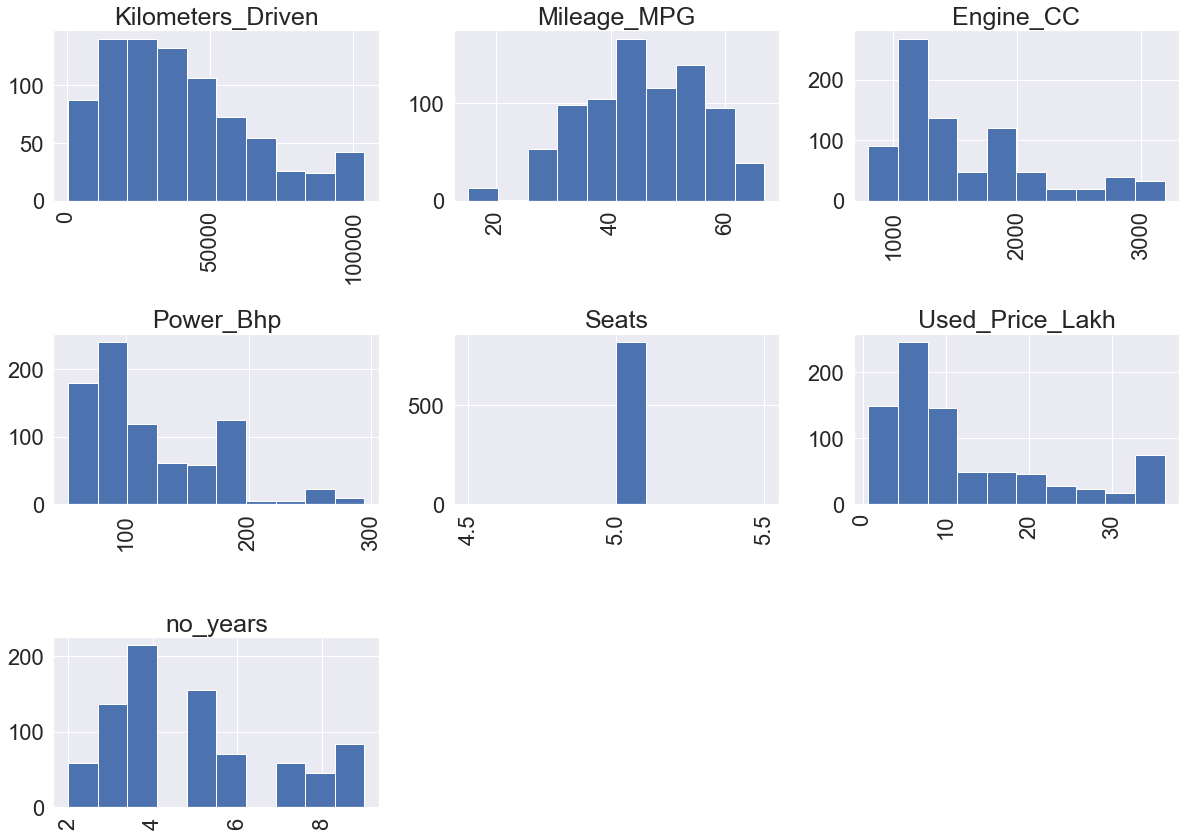

In [52]:
all_col = used_cars.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(17, 75))

for i in range(len(all_col)):
    plt.subplot (18, 3, i + 1)
    plt.hist(used_cars[all_col[i]])
    # sns.histplot(used_cars[all_col[i]], kde=True)  # you can comment the previous line and run this one to get distribution curves
    plt.tight_layout()
    plt.title(all_col[i], fontsize=25)
    plt.ticklabel_format(style='plain', axis='x',useOffset=False)
    plt.xticks(rotation=90)
plt.show()

**Some of the numerical columns are not normally distributed. Used Prices, Engine, Power Bhp and no of years are still skewed. We will use log transformation to make these columns appear more normally distributed.**

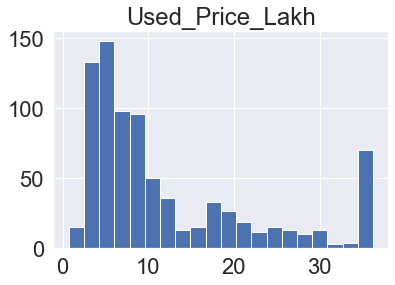

0


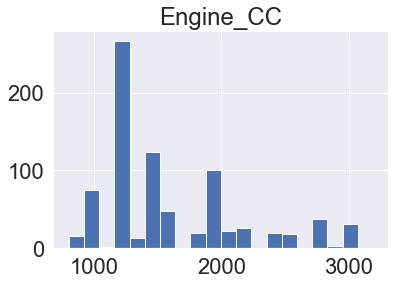

0


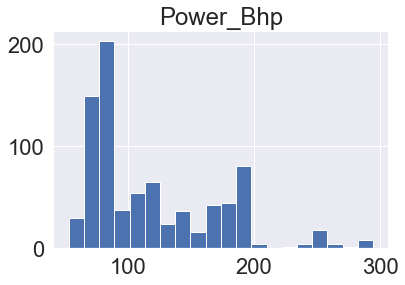

0


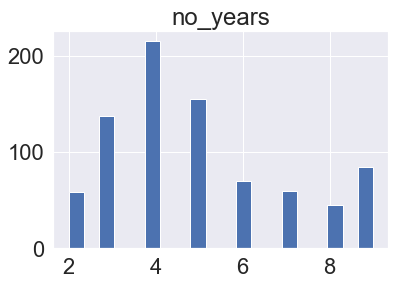

0


In [53]:
cols_to_log = ['Used_Price_Lakh', 'Engine_CC', 'Power_Bhp', 'no_years']
for colname in cols_to_log:
    plt.hist(used_cars[colname], bins=20)
    plt.title(colname)
    plt.show()
    print(np.sum(used_cars[colname] <= 0))

In [54]:

for colname in cols_to_log:
    used_cars[colname + '_log'] = np.log(used_cars[colname] + 1)
used_cars.drop(cols_to_log, axis=1, inplace=True)

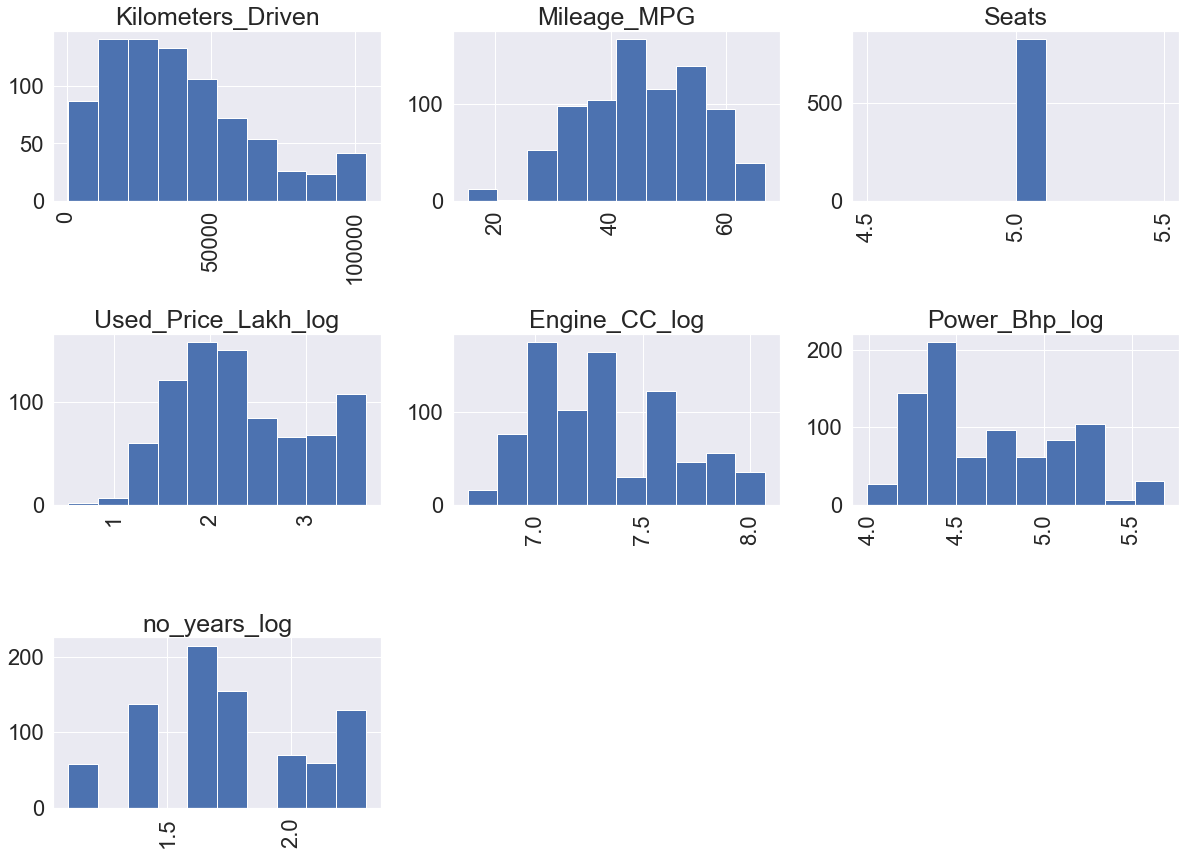

In [55]:
all_col = used_cars.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(17, 75))

for i in range(len(all_col)):
    plt.subplot (18, 3, i + 1)
    plt.hist(used_cars[all_col[i]])
    # sns.histplot(used_cars[all_col[i]], kde=True)  # you can comment the previous line and run this one to get distribution curves
    plt.tight_layout()
    plt.title(all_col[i], fontsize=25)
    plt.ticklabel_format(style='plain', axis='x',useOffset=False)
    plt.xticks(rotation=90)
plt.show()

 **Observed**
 Used Prices, Engine, Power Bhp and no of years appear to be more normally distributed.
 Now we can prepare the model.

In [56]:
 cat_vars = ['Transmission', 'Owner_Type', 'Fuel_Type', 'Brand_Type', 'Location'] 

for colname in cat_vars:
    used_cars[colname] = used_cars[colname].astype('category') #This converts the columns to categorical variable
    
used_cars.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 823 entries, 2 to 6014
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Location             823 non-null    category
 1   Kilometers_Driven    823 non-null    float64 
 2   Fuel_Type            823 non-null    category
 3   Transmission         823 non-null    category
 4   Owner_Type           823 non-null    category
 5   Mileage_MPG          823 non-null    float64 
 6   Seats                823 non-null    float64 
 7   Brand                823 non-null    object  
 8   Brand_Type           822 non-null    category
 9   Used_Price_Lakh_log  823 non-null    float64 
 10  Engine_CC_log        823 non-null    float64 
 11  Power_Bhp_log        823 non-null    float64 
 12  no_years_log         823 non-null    float64 
dtypes: category(5), float64(7), object(1)
memory usage: 102.7+ KB


# Data Preparation for Modeling

In [57]:
used_cars.head()

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage_MPG,Seats,Brand,Brand_Type,Used_Price_Lakh_log,Engine_CC_log,Power_Bhp_log,no_years_log
2,Chennai,46000.00,Petrol,Manual,First,42.81,5.0,Honda,Economical,1.704748,7.090077,4.496471,2.302585
7,Mumbai,36000.00,Diesel,Automatic,First,26.72,5.0,Toyota,Luxury,2.917771,7.921536,5.150397,1.791759
10,Kochi,25692.00,Petrol,Manual,First,50.71,5.0,Maruti,Mid_Range,2.393339,7.288244,4.646792,1.386294
15,Delhi,103841.25,Diesel,Manual,First,31.75,5.0,Mitsubishi,Mid_Range,2.772589,7.815207,5.173661,2.079442
20,Kochi,32982.00,Diesel,Automatic,First,53.37,5.0,BMW,Luxury,2.972975,7.598900,5.252273,2.079442


In [58]:
# defining X and y variables
#Seats will be dropped because it showed 0 collinearity with the dependent variable Used_Price_Lakh in the previous heatmap
#Brand will be dropped because it was previously categorized by price under Brand_Type 
X = used_cars.drop(['Used_Price_Lakh_log', 'Brand', 'Seats'], axis=1)
y = used_cars[['Used_Price_Lakh_log']]

print(X.head())
print(y.head())

   Location  Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage_MPG  \
2   Chennai           46000.00    Petrol       Manual      First        42.81   
7    Mumbai           36000.00    Diesel    Automatic      First        26.72   
10    Kochi           25692.00    Petrol       Manual      First        50.71   
15    Delhi          103841.25    Diesel       Manual      First        31.75   
20    Kochi           32982.00    Diesel    Automatic      First        53.37   

    Brand_Type  Engine_CC_log  Power_Bhp_log  no_years_log  
2   Economical       7.090077       4.496471      2.302585  
7       Luxury       7.921536       5.150397      1.791759  
10   Mid_Range       7.288244       4.646792      1.386294  
15   Mid_Range       7.815207       5.173661      2.079442  
20      Luxury       7.598900       5.252273      2.079442  
    Used_Price_Lakh_log
2              1.704748
7              2.917771
10             2.393339
15             2.772589
20             2.972975


In [59]:
print(X.shape)
print(y.shape)

(823, 10)
(823, 1)


In [60]:
# creating dummy variables
X = pd.get_dummies(X, columns=['Fuel_Type', 'Transmission', 'Owner_Type', 'Brand_Type', 'Location'], drop_first=True)
X.head()

,Kilometers_Driven,Mileage_MPG,Engine_CC_log,Power_Bhp_log,no_years_log,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Second,Owner_Type_Third,Brand_Type_Mid_Range,Brand_Type_Luxury,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune
2,46000.00,42.81,7.090077,4.496471,2.302585,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
7,36000.00,26.72,7.921536,5.150397,1.791759,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
10,25692.00,50.71,7.288244,4.646792,1.386294,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0
15,103841.25,31.75,7.815207,5.173661,2.079442,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0
20,32982.00,53.37,7.598900,5.252273,2.079442,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0


In [61]:
# split the data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [62]:
X_train.head()

,Kilometers_Driven,Mileage_MPG,Engine_CC_log,Power_Bhp_log,no_years_log,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Second,Owner_Type_Third,Brand_Type_Mid_Range,Brand_Type_Luxury,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune
1773,15135.0,41.1600,7.090077,4.496471,1.386294,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0
1652,4000.0,31.9900,7.600902,5.181784,1.609438,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
3244,15050.0,38.3400,7.579168,5.141664,1.609438,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2371,29202.0,15.2075,6.906755,4.220096,2.079442,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
962,8682.0,15.2075,7.576097,5.273000,1.386294,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [63]:
# fitting the model on the train data (70% of the whole data)
from sklearn.linear_model import LinearRegression

linearregression = LinearRegression()
linearregression.fit(X_train, y_train)

LinearRegression()

In [64]:
# let us check the coefficients and intercept of the model
pd.set_option(
    "display.float_format", lambda x: "%.3f" % x)
coef_df = pd.DataFrame(
    
    np.append(linearregression.coef_[0], linearregression.intercept_[0]),
    index=X_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)

coef_df

,Coefficients
Kilometers_Driven,-0.000
Mileage_MPG,0.000
Engine_CC_log,-0.098
Power_Bhp_log,0.730
no_years_log,-0.290
Fuel_Type_Diesel,0.104
Fuel_Type_Petrol,-0.058
Transmission_Manual,-0.080
Owner_Type_Second,-0.030
Owner_Type_Third,-0.608


# **We will check the model using metrics such as (MAE, MAPE, RMSE, R2)**

* We will be using metric functions defined in sklearn for RMSE, MAE, and R2.

* We will define a function to calculate MAPE.

* We will create a function which will print out all the above metrics in one go.




In [65]:
# defining function for MAPE
def mape(targets, predictions):
    return np.mean(np.abs((targets - predictions)) / targets) * 100


# defining common function for all metrics
def model_perf(model, inp, out):
    """
    model: model
    inp: independent variables
    out: dependent variable
    """
    y_pred = model.predict(inp).flatten()
    y_act = out.values.flatten()

    return pd.DataFrame(
        {
            "MAE": mean_absolute_error(y_act, y_pred),
            "MAPE": mape(y_act, y_pred),
            "RMSE": np.sqrt(mean_squared_error(y_act, y_pred)),
            "R^2": r2_score(y_act, y_pred),
        },# to display numbers in digits
        index=[0],
    )

In [66]:
# Checking model performance on train set (seen 70% data)
print("Train Performance\n")
model_perf(linearregression, X_train, y_train)

Train Performance



,MAE,MAPE,RMSE,R^2
0,0.141,6.668,0.192,0.923


In [67]:
# Checking model performance on test set (unseen 30% data)
print("Test Performance\n")
model_perf(linearregression, X_test, y_test)

Test Performance



,MAE,MAPE,RMSE,R^2
0,0.160,8.038,0.212,0.906


**Observations**

*  The training and testing scores are 92% and 91% respectively.  The model seems to be a good fit.
*   R^2  model explains 91% of the total variation in the data
*   MAE indicates that the model is able to predict the used price within a mean error of 0.16.
*  MAPE on the test indicates we can predict the price within 8% of the used price. 




# Linear Regression using statsmodels

In [68]:
# Let's build linear regression model using statsmodel
# unlike sklearn, statsmodels does not add a constant to the data on its own
# we have to add the constant manually
X = sm.add_constant(X)
X_train1, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

olsmod0 = sm.OLS(y_train, X_train1)
olsres0 = olsmod0.fit()
print(olsres0.summary())

                             OLS Regression Results                            
Dep. Variable:     Used_Price_Lakh_log   R-squared:                       0.923
Model:                             OLS   Adj. R-squared:                  0.920
Method:                  Least Squares   F-statistic:                     303.4
Date:                 Tue, 02 Sep 2025   Prob (F-statistic):          8.76e-292
Time:                         15:06:19   Log-Likelihood:                 134.34
No. Observations:                  576   AIC:                            -222.7
Df Residuals:                      553   BIC:                            -122.5
Df Model:                           22                                         
Covariance Type:             nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 

**Observations:**
*  Negative values of the coefficient show that used price decreases with the with the increase of those values
*  Positive values of the coefficient show that used price increases with the decrease of those values
*   There are many variables with a p-value more than 0.05 which would be considered significant. Many of these variables are higher than 5% due to one hot encoding.
*   There may also be variables with multicollinearity that could affect the p-values. We will examine other assumptions first before addressing the p-values




# Checking Linear Regression Assumptions


# TEST FOR MULTICOLLINEARITY


**Variation Inflation Factor:** Variance inflation factor (VIF) is a measure of the amount of multicollinearity in a set of multiple regression variables. If VIF is 1 there is no correlation. When VIF is higher than 5 there is moderate multicollinearity. 10 would be considered high multicollinearity.

In [69]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index=X.columns
)
print("VIF Scores: \n\n{}\n".format(vif_series1))

VIF Scores: 

const                  3243.222
Kilometers_Driven         2.009
Mileage_MPG               3.730
Engine_CC_log             9.861
Power_Bhp_log             7.891
no_years_log              1.990
Fuel_Type_Diesel         44.363
Fuel_Type_Petrol         34.823
Transmission_Manual       1.824
Owner_Type_Second         1.107
Owner_Type_Third          1.066
Brand_Type_Mid_Range      1.816
Brand_Type_Luxury         4.943
Location_Bangalore        1.836
Location_Chennai          2.279
Location_Coimbatore       4.197
Location_Delhi            2.380
Location_Hyderabad        2.944
Location_Jaipur           2.096
Location_Kochi            4.343
Location_Kolkata          2.467
Location_Mumbai           4.133
Location_Pune             2.582
dtype: float64




* Engine_CC_log and Power_Bhp_log have a VIF score that exceeds 5 but is below 10. This would be a moderate level of collinearity.

*   This shows the Engine and Power variables are correlated with each other.

*   This makes sense as the displacement volume of an engine will increases its power.






**Removing Multicollinearity**

**First**, we will remove any column containing a VIF score greater than 5 that is not a categorical variable.

**Second,** we will look at the adjusted R^2 of those models

**Third,** Drop the variable that makes least change in adjusted R-squared.

**Fourth,** Check the VIF scores again.

**Fifth** Continue till you get all VIF scores under 5.

In [70]:
# we drop the one with the highest vif values and check the adjusted R-squared
X_train2 = X_train1.drop('Engine_CC_log', axis=1)
vif_series2 = pd.Series(
    [variance_inflation_factor(X_train2.values, i) for i in range(X_train2.shape[1])],
    index=X_train2.columns,
)
print("VIF Scores: \n\n{}\n".format(vif_series2))

VIF Scores: 

const                  701.372
Kilometers_Driven        1.995
Mileage_MPG              2.444
Power_Bhp_log            4.761
no_years_log             1.932
Fuel_Type_Diesel        37.343
Fuel_Type_Petrol        32.666
Transmission_Manual      1.877
Owner_Type_Second        1.114
Owner_Type_Third         1.070
Brand_Type_Mid_Range     1.748
Brand_Type_Luxury        4.844
Location_Bangalore       1.815
Location_Chennai         2.078
Location_Coimbatore      3.901
Location_Delhi           2.567
Location_Hyderabad       2.995
Location_Jaipur          1.899
Location_Kochi           4.215
Location_Kolkata         2.337
Location_Mumbai          3.941
Location_Pune            2.473
dtype: float64



**The VIF score has been reduced significantly. Fuel_Types are the only variables with high VIF scores.**

In [71]:
olsmod1 = sm.OLS(y_train, X_train2)
olsres1 = olsmod1.fit()
print(olsres1.summary())

                             OLS Regression Results                            
Dep. Variable:     Used_Price_Lakh_log   R-squared:                       0.923
Model:                             OLS   Adj. R-squared:                  0.920
Method:                  Least Squares   F-statistic:                     317.6
Date:                 Tue, 02 Sep 2025   Prob (F-statistic):          9.41e-293
Time:                         15:06:26   Log-Likelihood:                 133.65
No. Observations:                  576   AIC:                            -223.3
Df Residuals:                      554   BIC:                            -127.5
Df Model:                           21                                         
Covariance Type:             nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 

*   Adj. R-squared's value has not changed.
*   We will now check to see if dropping Power Bhp would create a better model



In [72]:
X_train3 = X_train1.drop("Power_Bhp_log", axis=1)
vif_series3 = pd.Series(
    [variance_inflation_factor(X_train3.values, i) for i in range(X_train3.shape[1])],
    index=X_train3.columns,
)
print("VIF Scores: \n\n{}\n".format(vif_series3))

VIF Scores: 

const                  2852.038
Kilometers_Driven         2.019
Mileage_MPG               3.443
Engine_CC_log             5.630
no_years_log              1.892
Fuel_Type_Diesel         44.827
Fuel_Type_Petrol         36.061
Transmission_Manual       1.754
Owner_Type_Second         1.116
Owner_Type_Third          1.070
Brand_Type_Mid_Range      1.583
Brand_Type_Luxury         4.174
Location_Bangalore        1.816
Location_Chennai          2.081
Location_Coimbatore       3.896
Location_Delhi            2.567
Location_Hyderabad        3.001
Location_Jaipur           1.905
Location_Kochi            4.213
Location_Kolkata          2.336
Location_Mumbai           3.943
Location_Pune             2.476
dtype: float64



* There seems to have been a slight increase in VIF for Fuel Type but the rest of the variables have not changed much
* We can also check adjusted R^2 for both the data and make a decision based on the results.



In [73]:
olsmod2 = sm.OLS(y_train, X_train3)
olsres2 = olsmod2.fit()
print(olsres2.summary())

                             OLS Regression Results                            
Dep. Variable:     Used_Price_Lakh_log   R-squared:                       0.905
Model:                             OLS   Adj. R-squared:                  0.901
Method:                  Least Squares   F-statistic:                     250.5
Date:                 Tue, 02 Sep 2025   Prob (F-statistic):          9.88e-267
Time:                         15:06:29   Log-Likelihood:                 71.155
No. Observations:                  576   AIC:                            -98.31
Df Residuals:                      554   BIC:                            -2.476
Df Model:                           21                                         
Covariance Type:             nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 

*  We can see adj. R-squared for olsmod2 is 0.852 while for olsmod1 it is 0.857. When we dropped Engine_CC there were better results, therefore we will choose the first model.

**Observation:**
* Mileage_MPG have pvalues greater than .05. 
*  This variable is not significant and will have to be dropped. 
The other variables with high pvalues will not be dropped because they were created through one hot encoding.


**We will drop Mileage_MPG since it has the highest p-value greater than 0.05 and it is not a categorical variable**

In [74]:
X_train4 = X_train2.drop(['Mileage_MPG'], axis=1)

In [75]:
olsmod3 = sm.OLS(y_train, X_train4)
olsres3 = olsmod3.fit()
print(olsres3.summary())

                             OLS Regression Results                            
Dep. Variable:     Used_Price_Lakh_log   R-squared:                       0.923
Model:                             OLS   Adj. R-squared:                  0.920
Method:                  Least Squares   F-statistic:                     333.4
Date:                 Tue, 02 Sep 2025   Prob (F-statistic):          8.87e-294
Time:                         15:06:31   Log-Likelihood:                 133.07
No. Observations:                  576   AIC:                            -224.1
Df Residuals:                      555   BIC:                            -132.7
Df Model:                           20                                         
Covariance Type:             nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 

**Now there are no numerical variables with a pvalue greater than .05. X_train4 and olsres3 will be the final model.**



**Observations**
*  Our adjusted R^2 is 0.920. This means that it can explain 92% of variance. We can assume that this is a good model.
*   The adjusted R^2 in olsres0 was .92. Keep in mind that this included all the variables before they were dropped. It shows the model was not affected.



**Next we will check for other assumptions such as:**


*   Mean of residuals should be 0


*   Linearity of variables
*   Normality of error terms

*   Normality of error terms



*   No Heteroscedasticity





**Mean of Residuals Should Be 0**

In [76]:
residual = olsres3.resid
np.mean(residual)

-5.494447489577207e-15

*   The mean of resiudals is close to 0




# TEST FOR LINEARITY

**Check For Linearity**
We will make a plot of fitted values vs residuals. If they don't follow a pattern then the model is linear. It will be determined non linear if it follows a visually discernible pattern

In [77]:
residual = olsres3.resid
fitted = olsres3.fittedvalues  # predicted values

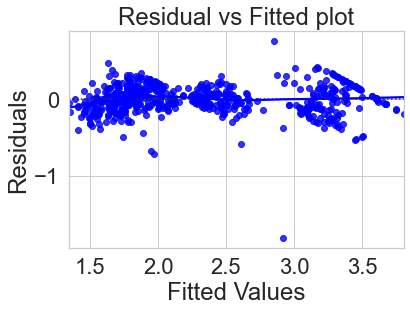

In [78]:
sns.set_style("whitegrid")
sns.residplot(fitted, residual, color="blue", lowess=True)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual vs Fitted plot")
plt.show()

*  Scatter plot shows the distribution of residuals (errors) vs fitted values (predicted values)
*  There is no clear discernible visual pattern in the plot
*  We can assume that the assumption is satisfied based on the plot




# TEST FOR NORMALITY

**Check the Normality:**

*   Can be checked using a QQ plot
*   In a **QQ plot**, Residuals following a normal distribution will make a straight line plot or it will not
*   **Shapiro-Wilk test** is another test for normality that we will use






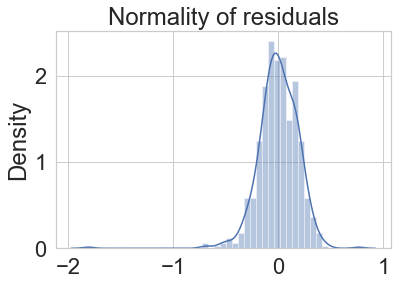

In [79]:
sns.distplot(residual)
plt.title("Normality of residuals")
plt.show()

**QQ plot**

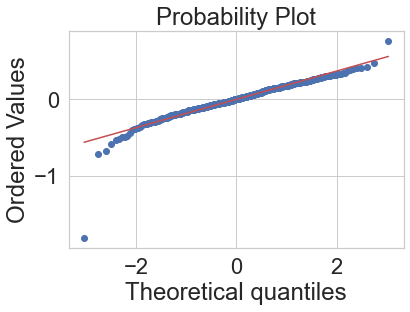

In [80]:
import pylab
import scipy.stats as stats

stats.probplot(residual, dist="norm", plot=pylab) #QQ plot
plt.show()

**Shapiro-Wilks Test**

In [81]:
stats.shapiro(residual) # Gives the statistic and p-value from left to right

ShapiroResult(statistic=0.9177629947662354, pvalue=3.700140014733018e-17)

*   Based on the Shapiro test the residuals are not normal but QQ plot shows that it is
*   Large datasets in Shapiro can appear as normal even if the deviations are small. 
*   It would be more advantageous to use the QQ plot



# TEST FOR HOMOSCEDASTICITY

**Test - Goldfeldquandt test**


*  **Homoscedacity**: If the variance of the residuals are symmetrically distributed across the regression line, then the data is said to homoscedastic.

*  **Heteroscedacity**: If the variance is unequal for the residuals across the regression line, then the data is said to be heteroscedastic. In this case the residuals can form an arrow shape or any other non symmetrical shape.





**The null and alternate hypotheses are as follows for goldfeldquandt test:**




  *   Null hypothesis : Residuals are homoscedastic
  *   Alternate hypothesis : Residuals have heteroscedasticity

In [82]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(residual, X_train4)
lzip(name, test)

[('F statistic', 1.1952236697013214), ('p-value', 0.07267027975771029)]

**Since the p-value > 0.05, we can say that the residuals are homoscedastic. This means the assumption is valid in the data.**

**Now that the assumptions have been checked we can move on to predictions**

# Predictions on Test Data

In [83]:
X_train4.columns

Index(['const', 'Kilometers_Driven', 'Power_Bhp_log', 'no_years_log',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Transmission_Manual',
       'Owner_Type_Second', 'Owner_Type_Third', 'Brand_Type_Mid_Range',
       'Brand_Type_Luxury', 'Location_Bangalore', 'Location_Chennai',
       'Location_Coimbatore', 'Location_Delhi', 'Location_Hyderabad',
       'Location_Jaipur', 'Location_Kochi', 'Location_Kolkata',
       'Location_Mumbai', 'Location_Pune'],
      dtype='object')

In [84]:

# Selecting columns from test data that we used to create our final model
X_test_final = X_test[X_train4.columns]

In [85]:
X_test_final

,const,Kilometers_Driven,Power_Bhp_log,no_years_log,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Second,Owner_Type_Third,Brand_Type_Mid_Range,Brand_Type_Luxury,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune
4570,1.000,3300.000,4.494,1.386,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
1256,1.000,54000.000,4.417,2.079,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
423,1.000,47000.000,5.240,1.792,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1200,1.000,59000.000,5.174,2.197,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2041,1.000,75000.000,4.145,2.303,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5940,1.000,27000.000,4.314,1.386,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5644,1.000,52951.000,4.489,2.079,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4734,1.000,103841.250,4.696,2.303,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1077,1.000,34688.000,4.494,1.099,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0


In [86]:

# Checking model performance on train set (seen 70% data)
print("Train Performance\n")
model_perf(olsres3, X_train4.values, y_train)

Train Performance



,MAE,MAPE,RMSE,R^2
0,0.141,6.665,0.192,0.923


In [87]:

# Checking model performance on test set (seen 70% data)
print("Test Performance\n")
model_perf(olsres3, X_test_final.values, y_test)

Test Performance



,MAE,MAPE,RMSE,R^2
0,0.160,7.962,0.209,0.909


In [88]:
# let us print the model summary

olsmod3 = sm.OLS(y_train, X_train4)
olsres3 = olsmod3.fit()
print(olsres3.summary())

                             OLS Regression Results                            
Dep. Variable:     Used_Price_Lakh_log   R-squared:                       0.923
Model:                             OLS   Adj. R-squared:                  0.920
Method:                  Least Squares   F-statistic:                     333.4
Date:                 Tue, 02 Sep 2025   Prob (F-statistic):          8.87e-294
Time:                         15:06:50   Log-Likelihood:                 133.07
No. Observations:                  576   AIC:                            -224.1
Df Residuals:                      555   BIC:                            -132.7
Df Model:                           20                                         
Covariance Type:             nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 

*   RMSE and MAE has low train and test data and both the errors are similar. This means the model is not likely suffering from overfitting
*   The model is able to explain 91% of the variation on the test set, which is excellent

*   The MAPE suggests we can predict within 8% of the used price







**The data shows that olsres3 is good for prediction and inference**

# Conclusion

***Olsres3*** **is our final model and it follows all the assumptions. This means in can be used for interpretations.**

1.   **Owner_Type_Second, Owner_Type_Third, No. of years owned and Kilometers_Driven** appear to **have a negative correlation **with used price based on the duration of use. Indicating that as more owners of a vehicle, kilometers driven and no. of years increase, the used price will decrease.

2. **Power Bhp, Brand_Type_Mid_Range and Brand_Type_Luxury** comes out to be very significant as expected. As the power of the engine increases, the price will understandably increase. This is due to the fact that higher end vehicles have better performance and shows why brand types such as mid-range and luxury show a **significant positvie correlation **as well.


3.   **Fuel_Type_Diesel** seems to indicate a **positive correlation** as well. Indicating that vehicles with these fuel types will have a higher price compared to Fuel_Type_Petrol.




